In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def change_bit(vector,n):  ##將第n位從0轉成1或者從1轉成0 
  vector = list(vector)
  vector[n] = str(int(not bool(int(vector[n]))))
  return ''.join(vector)

def get_fitness(vector):   ##返回1的數量
  return vector.count("1")

def mutate(vector, mutation_rate):  ##每一位數都有mutation_rate的機率變異
  for bit in range(100):
    r = random.uniform(0,1)
    if r < mutation_rate:
      vector = change_bit(vector, bit)
  return vector

def crossover(parent_vector1, parent_vector2, mutation_rate):  ##結合兩個父母的染色體，拆的地方是隨機的
  seperate_line = random.randint(0,99)
  offspring1 = parent_vector1[:seperate_line] + parent_vector2[seperate_line:]
  offspring2 = parent_vector2[:seperate_line] + parent_vector1[seperate_line:]
  return [mutate(offspring1, mutation_rate), mutate(offspring2, mutation_rate)]

def select(population, crossover_rate, method = "Tournament"):  ##根據Roulette wheel selection或者Tournament selection的方法選擇可以繁衍的染色體
  selection = []
  selection_num = 2 * int(len(population) * crossover_rate/2)
  if method == "Roulette":
    fitness = []
    for chromosome in population:
      fitness.append(get_fitness(chromosome))
    k = 0
    while len(selection) < selection_num:
      k += 1
      i = k % len(population)
      r = random.uniform(0,1)
      if r < fitness[i]/sum(fitness):
        selection.append(population[i])

  if method == "Tournament":
    while len(selection) < selection_num:
      n_select = random.choices(population, k =5)
      n_select_fitness = []
      for chromosome in n_select:
        n_select_fitness.append(get_fitness(chromosome))
      selection.append(n_select[np.argmax(n_select_fitness)])  
  return selection

In [ ]:
max_run = 30  
population_size = 100 
mutation_rate = 0.01  
crossover_rate = 0.8
max_generation = 100
shortest_distance = np.Inf  ##最短距離初始化
record = np.zeros((max_run, max_generation), dtype='int') ##紀錄信息

for run in range(max_run):
  population = []
  for i in range(population_size):
    population.append(bin(random.randint(0,int("1"*100, 2)))[2:].zfill(100))  ##隨機生成一定數量的個染色體
  for generation in range(max_generation):
    selection = select(population, crossover_rate, method="Roulette")  ##根據crossover_rate選擇一定數量的染色體用來繁衍（可能重複）
    nonselection = [x for x in population if x not in selection]  ##將沒被選上的拿出來
    selection = random.sample(selection,  k=len(selection))  ##打亂順序繁衍
    offspring = []
    for j in range(int(len(selection)/2)):
      offspring = offspring + crossover(selection[2*j], selection[2*j+1], mutation_rate)  ##將選中的染色體兩兩配對繁衍
    population = random.sample(nonselection,  k=len(nonselection))[:100-len(offspring)] + offspring  ##由於選擇的時候可能重複，因此為了不讓總population超過100，刪去一部分沒被選上的染色體
    population_fitness = []
    for one in population:
      population_fitness.append(get_fitness(one))
    record[run, generation] = max(population_fitness)
    print(run, generation, max(population_fitness))

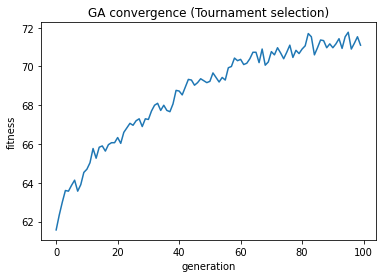

In [ ]:
average_record = np.mean(record, axis = 0) ##取30次平均
plt.title('GA convergence (Roulette selection)')
plt.xlabel('generation')
plt.ylabel('fitness')
plt.plot(range(max_generation), average_record, '-') ##畫出收斂圖